In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
#df = pd.read_csv("../dataset/customer_supermarket_no_inconsistency.csv", parse_dates=["BasketDate"], index_col=0, decimal=",")
df = pd.read_csv("../dataset/customer_supermarket_no_inconsistency.csv", sep="\t", index_col=0, parse_dates=["BasketDate"], decimal=",")
df.head()

,BasketID,BasketDate,ProdID,Qta,Sale,CustomerID,CustomerCountry,ProdDescr
0,536365,2010-01-12 08:26:00,21730,6,4.25,17850,United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER
1,536365,2010-01-12 08:26:00,22752,2,7.65,17850,United Kingdom,SET 7 BABUSHKA NESTING BOXES
2,536365,2010-01-12 08:26:00,71053,6,3.39,17850,United Kingdom,WHITE METAL LANTERN
3,536365,2010-01-12 08:26:00,84029E,6,3.39,17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.
4,536365,2010-01-12 08:26:00,84029G,6,3.39,17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE


In [19]:
df.Sale = df.Sale.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387881 entries, 0 to 387880
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   BasketID         387881 non-null  int64         
 1   BasketDate       387881 non-null  datetime64[ns]
 2   ProdID           387881 non-null  object        
 3   Qta              387881 non-null  int64         
 4   Sale             387881 non-null  float64       
 5   CustomerID       387881 non-null  int64         
 6   CustomerCountry  387881 non-null  object        
 7   ProdDescr        387881 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 26.6+ MB


In [20]:
ind = pd.read_csv("../dataset/indicators.csv", index_col=0)
ind.CustomerID = ind.CustomerID.astype(int)
print(ind.head())
print(ind.info())

   CustomerID        Entropy   imax   iu      i
0       12346 -832300.560951  74215    1  74215
1       12347  -14642.853340    319  103   2458
2       12348  -15464.124169   1254   22   2341
3       12349   -4068.249999    631   73    631
4       12350   -1040.791135    197   17    197
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   int64  
 1   Entropy     4339 non-null   float64
 2   imax        4339 non-null   int64  
 3   iu          4339 non-null   int64  
 4   i           4339 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 203.4 KB
None


In [21]:
customers = df.groupby(["CustomerID"]).agg({
    'CustomerCountry':'min',
    "Sale":sum})
customers.head()

,CustomerCountry,Sale
CustomerID,,
12346,United Kingdom,1.04
12347,Iceland,481.21
12348,Finland,178.71
12349,Italy,605.10
12350,Norway,65.30


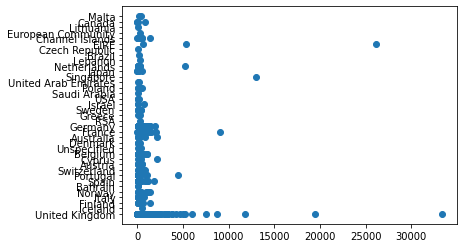

In [22]:
plt.scatter(customers.Sale, customers.CustomerCountry)

Joining total sales with indicators dataframe on customer id

In [23]:
ind = ind.join(customers, on="CustomerID")
ind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       4339 non-null   int64  
 1   Entropy          4339 non-null   float64
 2   imax             4339 non-null   int64  
 3   iu               4339 non-null   int64  
 4   i                4339 non-null   int64  
 5   CustomerCountry  4339 non-null   object 
 6   Sale             4339 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 271.2+ KB


In [24]:
# dropping customer country String column
ind_no_cust = ind.drop("CustomerCountry", axis=1)

In [25]:
ind_no_cust.describe()

,CustomerID,Entropy,imax,iu,i,Sale
count,4339.000000,4.339000e+03,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,-7.707500e+03,263.135976,61.489283,1190.570869,282.908362
std,1721.889758,4.232504e+04,1196.269335,85.363900,5053.148126,875.427416
min,12346.000000,-1.701273e+06,1.000000,1.000000,1.000000,0.000000
25%,13812.500000,-5.555836e+03,82.000000,16.000000,159.000000,51.615000
50%,15299.000000,-1.973313e+03,155.000000,35.000000,378.000000,125.450000
75%,16778.500000,-7.623511e+02,281.000000,77.000000,990.500000,289.160000
max,18287.000000,0.000000e+00,74215.000000,1787.000000,197491.000000,33332.450000


#### We drop the entropy since it fucks up our graphs for now

In [26]:
ind_no_ent = ind_no_cust.drop("Entropy", axis=1)

### Scaling values in order to avoid bias by using a standard scaler

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [29]:
scaler = MinMaxScaler()
# we could also try with the standard scaler
scaler.fit(ind_no_ent.values)

MinMaxScaler()

In [30]:
ind_no_ent.head().values

array([[1.2346e+04, 7.4215e+04, 1.0000e+00, 7.4215e+04, 1.0400e+00],
       [1.2347e+04, 3.1900e+02, 1.0300e+02, 2.4580e+03, 4.8121e+02],
       [1.2348e+04, 1.2540e+03, 2.2000e+01, 2.3410e+03, 1.7871e+02],
       [1.2349e+04, 6.3100e+02, 7.3000e+01, 6.3100e+02, 6.0510e+02],
       [1.2350e+04, 1.9700e+02, 1.7000e+01, 1.9700e+02, 6.5300e+01]])

In [31]:
scaler.transform(ind_no_ent.head().values)

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.75786116e-01,
        3.12008268e-05],
       [1.68321831e-04, 4.28490581e-03, 5.71108623e-02, 1.24411363e-02,
        1.44366826e-02],
       [3.36643663e-04, 1.68836069e-02, 1.17581187e-02, 1.18487012e-02,
        5.36144208e-03],
       [5.04965494e-04, 8.48896435e-03, 4.03135498e-02, 3.19003494e-03,
        1.81534811e-02],
       [6.73287325e-04, 2.64101113e-03, 8.95856663e-03, 9.92455314e-04,
        1.95905191e-03]])

In [32]:
X = scaler.fit_transform(ind_no_ent.values)

## K-Means

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
kmeans = KMeans(n_clusters=6, n_init=10, max_iter=150)
kmeans.fit(X)

KMeans(max_iter=150, n_clusters=6)

In [35]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

size of each cluster

In [36]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([895, 865, 847, 865, 858,   9]))

In [37]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 895, 1: 865, 2: 847, 3: 865, 4: 858, 5: 9}

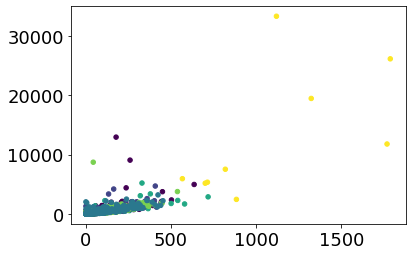

In [38]:
plt.scatter(ind_no_ent['iu'], ind_no_ent['Sale'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

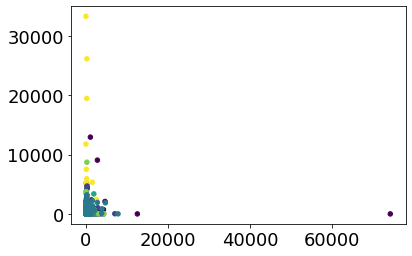

In [39]:
plt.scatter(ind_no_ent['imax'], ind_no_ent['Sale'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

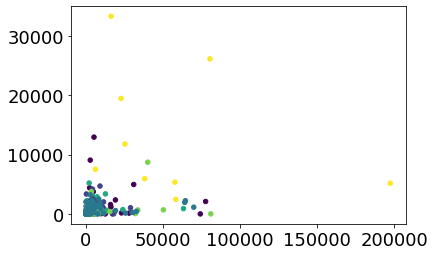

In [40]:
plt.scatter(ind_no_ent['i'], ind_no_ent['Sale'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

In [41]:
"""plt.scatter(ind['iu'], ind['Entropy'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()"""

"plt.scatter(ind['iu'], ind['Entropy'], \n            c=kmeans.labels_, s=20)\nplt.tick_params(labelsize=18)\nplt.show()"

In [42]:
"""plt.scatter(ind['Sale'], ind['Entropy'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()"""

"plt.scatter(ind['Sale'], ind['Entropy'], \n            c=kmeans.labels_, s=20)\nplt.tick_params(labelsize=18)\nplt.show()"

In [43]:
kmeans.cluster_centers_

array([[0.09879948, 0.00534197, 0.03217427, 0.00674911, 0.00883431],
       [0.5048699 , 0.00324284, 0.0317133 , 0.00438153, 0.00731859],
       [0.90145588, 0.00299961, 0.03253409, 0.00571362, 0.00726585],
       [0.3045768 , 0.00299426, 0.03425152, 0.00489632, 0.00765048],
       [0.70218533, 0.00295747, 0.03277932, 0.00544953, 0.00733969],
       [0.40208345, 0.00728374, 0.60177927, 0.28293472, 0.39065769]])

### A che serve sta cagata? boh!
non mi sembra abbia senso, forse è sbagliato qualcosa

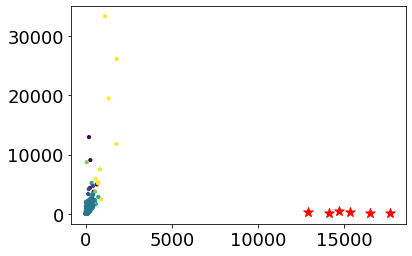

In [44]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(ind_no_ent['iu'], ind_no_ent['Sale'], c=kmeans.labels_, 
            s=10)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

### Cluster Centers as parallel coordinates

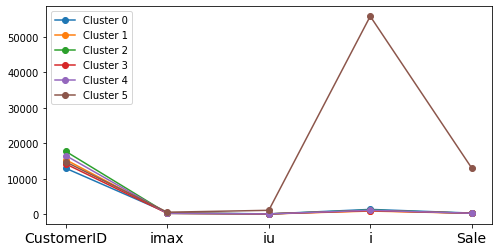

In [45]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(ind_no_ent.columns)), ind_no_ent.columns, fontsize=14)
plt.legend(fontsize=10)
plt.show()

### Centroids radar chart

<ipython-input-46-f01a45e21066>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(polar=True)


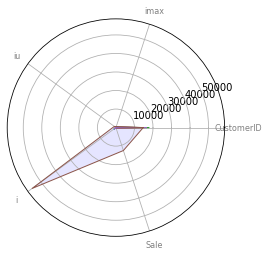

In [46]:
from math import pi
 
# number of variable
N = len(ind_no_ent.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], ind_no_ent.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)


#### SSE and Clustering Validation

a che serve sta roba?

In [47]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

SSE 26.70793939180726
Silhouette 0.4835864342044448
Separation 0.7212297226046401


In [48]:
ind

,CustomerID,Entropy,imax,iu,i,CustomerCountry,Sale
0,12346,-832300.560951,74215,1,74215,United Kingdom,1.04
1,12347,-14642.853340,319,103,2458,Iceland,481.21
2,12348,-15464.124169,1254,22,2341,Finland,178.71
3,12349,-4068.249999,631,73,631,Italy,605.10
4,12350,-1040.791135,197,17,197,Norway,65.30
...,...,...,...,...,...,...,...
4334,18280,-171.299812,45,10,45,United Kingdom,47.65
4335,18281,-215.405139,54,7,54,United Kingdom,39.36
4336,18282,-417.113335,75,12,103,United Kingdom,62.39
4337,18283,-6354.286026,61,263,1357,United Kingdom,1174.33


In [49]:
sale_xt_pct = pd.crosstab(kmeans.labels_,ind['Sale'])
ccountry_xt_pct = pd.crosstab(kmeans.labels_,ind['CustomerCountry'])
iu_xt_pct = pd.crosstab(kmeans.labels_,ind["iu"])

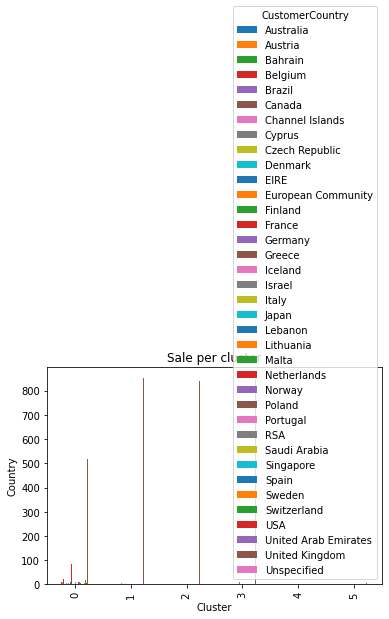

In [50]:
ccountry_xt_pct.plot(kind='bar', stacked=False, 
                   title='Sale per cluster')
plt.xlabel('Cluster')
plt.ylabel('Country')
plt.show()

# no, così non funziona, dobbiamo trovare degli indicatori categorici 
# (tipo calcolarci noi se un cliente è highly spending eccetera)

In [51]:
"""sale_xt_pct.plot(kind='bar', stacked=False, 
                   title='Sale per cluster')
plt.xlabel('Cluster')
plt.ylabel('Sale')
plt.show()"""

"sale_xt_pct.plot(kind='bar', stacked=False, \n                   title='Sale per cluster')\nplt.xlabel('Cluster')\nplt.ylabel('Sale')\nplt.show()"

Computing the best K

In [52]:
sse_list = list()
max_k = 40
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

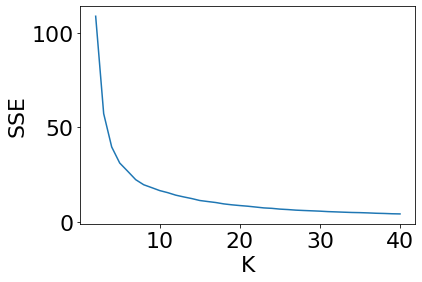

In [53]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

Best K seems to be 5 or 6

In [54]:
#Similarity between assignments
i = ind.i
metrics.adjusted_rand_score(i, kmeans.labels_)

0.0003755065936687142

Boia che schifo (fa schifo con qualunque colonna abbia provato fino ad ora)

## DBSCAN

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
dbscan = DBSCAN(eps=0.07, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.07, min_samples=3)

In [57]:
dbscan.labels_

array([-1,  0,  0, ...,  0,  0,  0])

In [58]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([  38, 4298,    3]))

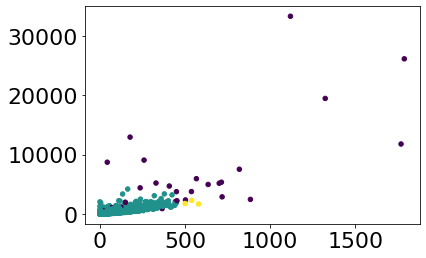

In [59]:
plt.scatter(ind_no_ent['iu'], ind_no_ent['Sale'], 
            c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [60]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.12958464534042458


Best eps with knee method

In [61]:
from scipy.spatial.distance import pdist, squareform

In [62]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[1.06157304 1.04839642 1.0601301  ... 0.14458217 0.0279676  0.11879203]

[[0.         1.06157304 1.04839642 ... 1.46191411 1.46829779 1.45713102]
 [1.06157304 0.         0.04794098 ... 1.00044397 1.00340353 1.00021132]
 [1.04839642 0.04794098 0.         ... 0.99903414 1.00864511 0.99994105]
 ...
 [1.46191411 1.00044397 0.99903414 ... 0.         0.14458217 0.0279676 ]
 [1.46829779 1.00340353 1.00864511 ... 0.14458217 0.         0.11879203]
 [1.45713102 1.00021132 0.99994105 ... 0.0279676  0.11879203 0.        ]]


In [63]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

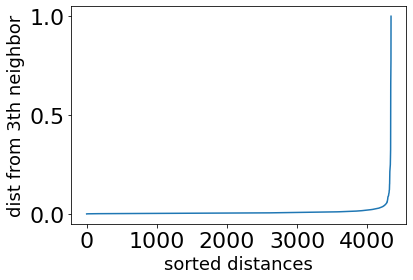

In [64]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Hierarchical clustering

In [65]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

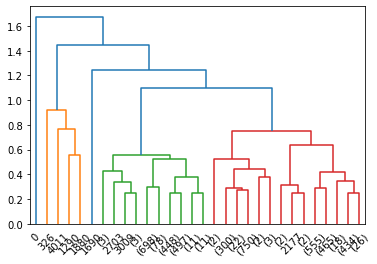

In [66]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

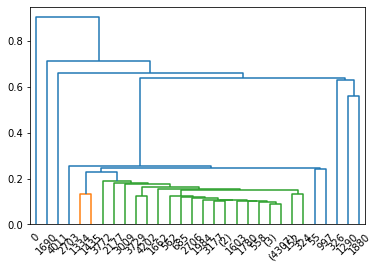

In [67]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

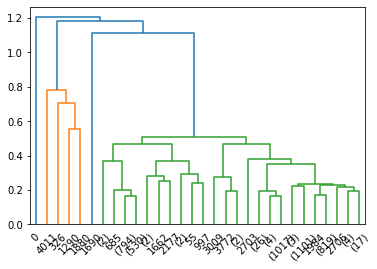

In [68]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1, truncate_mode='lastp')